Matplotlib is building the font cache; this may take a moment.


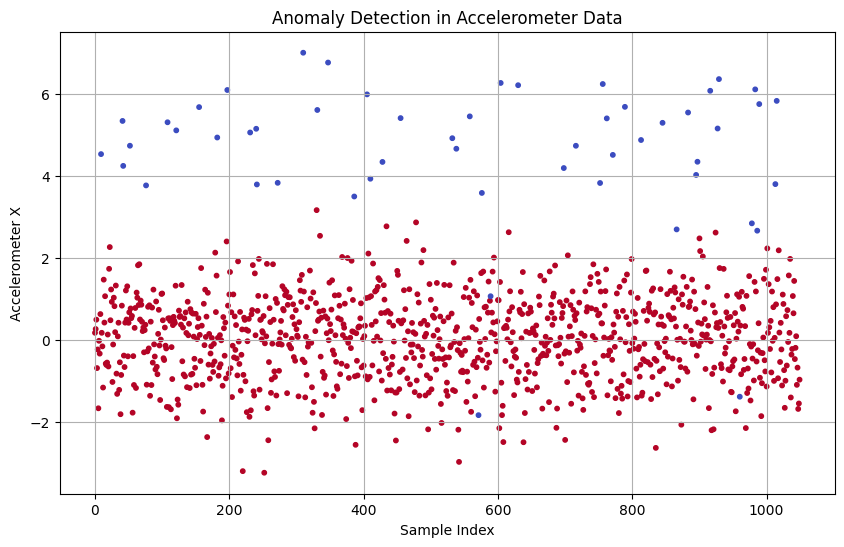

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Generate synthetic sensor data
def generate_sensor_data(samples=1000):
    normal_data = np.random.normal(loc=0.0, scale=1.0, size=(samples, 3))
    anomaly_data = np.random.normal(loc=5.0, scale=1.0, size=(int(samples * 0.05), 3))
    data = np.vstack([normal_data, anomaly_data])
    np.random.shuffle(data)
    return pd.DataFrame(data, columns=['acc_x', 'strain', 'temp'])

# Load and scale the data
sensor_df = generate_sensor_data()
scaler = MinMaxScaler()
sensor_df_scaled = scaler.fit_transform(sensor_df)

# Train Isolation Forest
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(sensor_df_scaled)
preds = model.predict(sensor_df_scaled)

# Assign predictions
sensor_df['anomaly'] = preds

# Visualize anomalies
plt.figure(figsize=(10, 6))
plt.scatter(sensor_df.index, sensor_df['acc_x'], c=sensor_df['anomaly'], cmap='coolwarm', s=10)
plt.title('Anomaly Detection in Accelerometer Data')
plt.xlabel('Sample Index')
plt.ylabel('Accelerometer X')
plt.grid(True)
plt.show()
